In [ ]:
pip install tf-models-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.1 MB/s 
     |████████████████████████████████| 1.1 MB 62.0 MB/s 
     |████████████████████████████████| 92 kB 12.6 MB/s 
     |████████████████████████████████| 4.6 MB 51.9 MB/s 
     |████████████████████████████████| 1.2 MB 39.5 MB/s 
     |████████████████████████████████| 352 kB 93.7 MB/s 
     |████████████████████████████████| 511.7 MB 4.7 kB/s 
     |████████████████████████████████| 237 kB 86.1 MB/s 
     |████████████████████████████████| 636 kB 69.7 MB/s 
     |████████████████████████████████| 48.3 MB 223 kB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 99 kB 11.5 MB/s 
     |████████████████████████████████| 1.6 MB 54.0 MB/s 
     |████████████████████████████████| 5.8 MB 59.1 MB/s 
     |████████████████████████████████| 438 kB 91.7 MB/s 
  Created wheel for py-cpuinfo: fil

In [ ]:
pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import string 
import re
import nltk
from nltk.corpus import stopwords


## Load the Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/NLP_week_05/Data_NLP/Data_title_topics.csv', usecols = [0,1,2,4]) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df.loc[322]['Title']

'microsoft buys mobile data labs for\x9d\x9d\x9dyou got it\x9d\x9d\x9dmobile expertise'

In [ ]:
df['Title']=df['Title'].apply(lambda x:re.sub(r'\x9d',' ',x))

In [ ]:
df.loc[322]['Title']

'microsoft buys mobile data labs for   you got it   mobile expertise'

In [ ]:
print(df.shape)
print()
print("Missing values")
df.isnull().sum()

(67914, 4)

Missing values


Title               0
Headline           11
Topic               0
Title_length    67914
dtype: int64

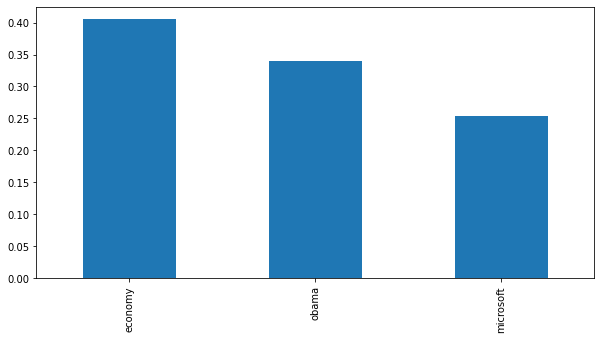

In [ ]:
(df["Topic"].value_counts()/len(df)).plot.bar(figsize = (10,5))

# Insights

In [ ]:
!python --version


Python 3.7.13


In [ ]:
def TextPreProcessing(sentence):
  text = sentence.lower()
  sentence = "".join([char for char in text if char not in string.punctuation])
  #clean_sentence= re.sub(r'https?:\/\/.*[\r\n]*','', sentence)
  clean_sentence = re.sub(r'&#039;',"'",clean_sentence)
  clean_sentence = re.sub(r'\r\n','',clean_sentence)
  clean_sentence = re.sub(r'"','',clean_sentence)
  #clean_sentence=''.join([ x for x in clean_sentence.split() if x not in stop_words])

  return clean_sentence

In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.9.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: termcolor, tensorflow-io-gcs-filesystem, grpcio, typing-extensions, packaging, astunparse, tensorflow-estimator, tensorboard, six, google-pasta, absl-py, gast, h5py, wrapt, keras-preprocessing, flatbuffers, libclang, keras, setuptools, opt-einsum, protobuf, numpy
Required-by: tf-models-official, tensorflow-text, kapre


In [ ]:
#Percentage of data conserved


In [ ]:
import string
import re

# Creating some variables for DA

In [ ]:
import string 
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,Title,Headline,Topic,Title_length
0,obama lays wreath at arlington national cemetery,Obama Lays Wreath at Arlington National Cemete...,obama,NaN
1,a look at the health of the chinese economy,"Tim Haywood, investment director business-unit...",economy,NaN
2,nouriel roubini global economy not back to 2008,"Nouriel Roubini, NYU professor and chairman at...",economy,NaN
3,finland gdp expands in q4,Finland's economy expanded marginally in the t...,economy,NaN
4,tourism govt spending buoys thai economy in ja...,Tourism and public spending continued to boost...,economy,NaN


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def TextPreProcessing(sentence):
  text = sentence.lower()
  sentence = "".join([char for char in text if char not in string.punctuation])
  clean_sentence= re.sub(r'https?:\/\/.*[\r\n]*','', sentence)
  
  #clean_sentence = re.sub(r'\r\n','',clean_sentence)
  #clean_sentence = re.sub(r'"','',clean_sentence)
  
  #no need beacause will use a preprocessing layer
  #clean_sentence=''.join([ x for x in clean_sentence.split() if x not in stop_words])


  return clean_sentence

# Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

import os
import shutil

We are going to use a embedder conected to a classifier 

In [ ]:
tf.get_logger().setLevel('ERROR')

In [ ]:
tfhub_handle_encoder= 'https://tfhub.dev/tensorflow/albert_en_base/2'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/albert_en_preprocess/3'

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(),dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess,trainable=False, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder,trainable=False,name='alBERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(3, activation = tf.keras.activations.softmax, name='classifier')(net)
  #net = tf.keras.layers.Dense(1, activation = tf.math.argmax , name='output')(net)
  return tf.keras.Model(text_input,net)

In [ ]:
classifier_model = build_classifier_model() 

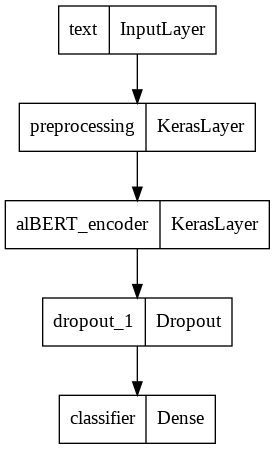

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
labels={'obama':0,'economy':1,'microsoft':2,'palestine':np.nan}


df['Topic'] = df['Topic'].apply(lambda x: labels[x])


In [ ]:
df

,Title,Headline,Topic,Title_length
0,obama lays wreath at arlington national cemetery,Obama Lays Wreath at Arlington National Cemete...,0,NaN
1,a look at the health of the chinese economy,"Tim Haywood, investment director business-unit...",1,NaN
2,nouriel roubini global economy not back to 2008,"Nouriel Roubini, NYU professor and chairman at...",1,NaN
3,finland gdp expands in q4,Finland's economy expanded marginally in the t...,1,NaN
4,tourism govt spending buoys thai economy in ja...,Tourism and public spending continued to boost...,1,NaN
...,...,...,...,...
67909,american airlines 7879 with premium economy to...,The Fort Worth-based airline's first Boeing 78...,1,NaN
67910,uk economy heading for marked slowdown after q...,"LONDON, July 7 (Reuters) - Britain's economy l...",1,NaN
67911,stocks rise as investors key in on us economy ...,The June employment report is viewed as a cruc...,1,NaN
67912,russian pm proposes to use conservative and to...,"In addition, establish stimulating economic po...",1,NaN


In [ ]:
df['Topic'].value_counts()

1    27495
0    23130
2    17289
Name: Topic, dtype: int64

In [ ]:
X_train=df['Title'].sample(frac=.3)
y_train1=df['Topic'].loc[X_train.index]


X_val=X_train.sample(frac=.2)
X_train=X_train.drop(X_val.index)
X_test=X_val.sample(frac=.5)
X_val=X_val.drop(X_test.index)

y_train=y_train1.loc[X_train.index]
y_val= y_train1.loc[X_val.index]
y_test=y_train1.loc[X_test.index]






In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 500
seed = 101


raw_train_ds = tf.data.Dataset.from_tensor_slices( (tf.cast(X_train.values,tf.string), tf.keras.utils.to_categorical(y_train.values,num_classes=3)))
raw_train_ds = raw_train_ds.batch(batch_size)
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

raw_val_ds = tf.data.Dataset.from_tensor_slices((tf.cast(X_val.values,tf.string),tf.keras.utils.to_categorical(y_val.values,num_classes=3)))
raw_val_ds = raw_val_ds.batch(batch_size)
val_ds = raw_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

raw_test_ds = tf.data.Dataset.from_tensor_slices((tf.cast(X_test.values,tf.string),tf.keras.utils.to_categorical(y_test.values,num_classes=3)))
raw_test_ds = raw_test_ds.batch(batch_size)
test_ds = raw_test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
y_train

45777    2
62483    0
41458    1
10681    1
38035    1
        ..
47495    1
6860     1
17768    1
47582    2
60068    1
Name: Topic, Length: 16299, dtype: int64

In [ ]:
tf.keras.utils.to_categorical(y_train.values,num_classes=3)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
raw_train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [ ]:
from official.nlp import optimization

In [ ]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 5e-4
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()#from_logits=True)
metrics = [tf.metrics.CategoricalAccuracy(),tf.metrics.Recall(),tf.metrics.Precision()]

In [ ]:
classifier_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
history = classifier_model.fit(x=train_ds,validation_data=val_ds, epochs = epochs)

Epoch 1/15
128/128 [==============================] - 235s 2s/step - loss: 0.5750 - categorical_accuracy: 0.7978 - recall_2: 0.7103 - precision_2: 0.8623 - val_loss: 0.5386 - val_categorical_accuracy: 0.8144 - val_recall_2: 0.7359 - val_precision_2: 0.8720
Epoch 2/15
128/128 [==============================] - 231s 2s/step - loss: 0.5234 - categorical_accuracy: 0.8201 - recall_2: 0.7497 - precision_2: 0.8712 - val_loss: 0.5003 - val_categorical_accuracy: 0.8238 - val_recall_2: 0.7619 - val_precision_2: 0.8734
Epoch 3/15
128/128 [==============================] - 231s 2s/step - loss: 0.4921 - categorical_accuracy: 0.8285 - recall_2: 0.7682 - precision_2: 0.8750 - val_loss: 0.4749 - val_categorical_accuracy: 0.8301 - val_recall_2: 0.7820 - val_precision_2: 0.8806
Epoch 4/15
128/128 [==============================] - 231s 2s/step - loss: 0.4729 - categorical_accuracy: 0.8351 - recall_2: 0.7804 - precision_2: 0.8805 - val_loss: 0.4591 - val_categorical_accuracy: 0.8419 - val_recall_2: 0.788

In [ ]:
history.history

{'categorical_accuracy': [0.4944474995136261,
  0.6986931562423706,
  0.7610282897949219,
  0.775446355342865,
  0.7882078886032104],
 'loss': [1.0526279211044312,
  0.7581260800361633,
  0.6611970067024231,
  0.6190609335899353,
  0.5983414053916931],
 'precision_1': [0.5488879084587097,
  0.796743631362915,
  0.8372018337249756,
  0.8477609753608704,
  0.8574689626693726],
 'recall_1': [0.3058469891548157,
  0.5464138984680176,
  0.6395484209060669,
  0.6771581172943115,
  0.6913307309150696],
 'val_categorical_accuracy': [0.6936671733856201,
  0.7491409182548523,
  0.7746686339378357,
  0.7952871918678284,
  0.8060873746871948],
 'val_loss': [0.8157894015312195,
  0.6879979968070984,
  0.6259080767631531,
  0.5939858555793762,
  0.5835110545158386],
 'val_precision_1': [0.8384013772010803,
  0.8537576198577881,
  0.8664987683296204,
  0.8680171966552734,
  0.8746928572654724],
 'val_recall_1': [0.47373589873313904,
  0.6190476417541504,
  0.6755031943321228,
  0.6941580772399902,
  

dict_keys(['categorical_accuracy', 'loss', 'precision_1', 'recall_1', 'val_categorical_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1'])


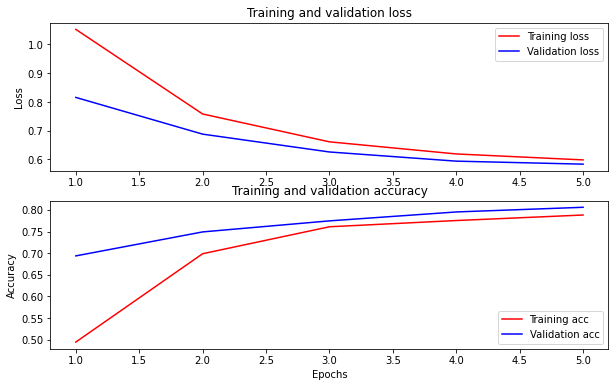

In [ ]:
# Plot Training accuracy and loss
history_dict = history
print(history_dict.keys())

acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
dataset_name = 'model_news_topics'
saved_model_path = '/content/drive/MyDrive/NLP_week_05/{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

NameError: ignored

In [ ]:
reloaded_model = tf.saved_model.load('/content/drive/MyDrive/NLP_week_05/{}_bert'.format(dataset_name.replace('/', '_'))
)

In [ ]:
print('hi')

hi


In [ ]:
result=np.argmax(reloaded_model((tf.cast(['President Obama Dies','China stocks fall 20 percent'],tf.string))),axis=1)

In [ ]:
back_labels[result[1]]

'economy'

In [ ]:
labels

{'economy': 1, 'microsoft': 2, 'obama': 0, 'palestine': nan}

In [ ]:
back_labels={ 1:'economy', 2:'microsoft',  0:'obama',}